## Technical Analysis

### Perform technical analysis in Python on the 2022 American Express Stocks . Create the Bollinger Bands for the stock.

In [3]:
#import necessary libraries
import numpy as np
import ta
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
from pandas_datareader import data as wb
from prophet import Prophet
plt.style.use('fivethirtyeight')



In [4]:
# Set plot style and size
plt.style.use("seaborn")
plt.rcParams["figure.figsize"]= [14,8]


In [5]:
# Download stock data for American Express for the year 2022
myticker="AXP"
mydata=pd.DataFrame()
mydata[myticker]=yf.download(myticker,start="2022-01-01",end="2022-12-31")['Adj Close']
mydata.columns={'Close Price'}
mydata.head(10)



df=mydata.copy()

[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

,Close Price
Date,
2022-01-03,165.482666
2022-01-04,170.795090
2022-01-05,168.975082
2022-01-06,170.523499
2022-01-07,171.983170


<Axes: title={'center': 'American Express Stocks'}, xlabel='Date'>

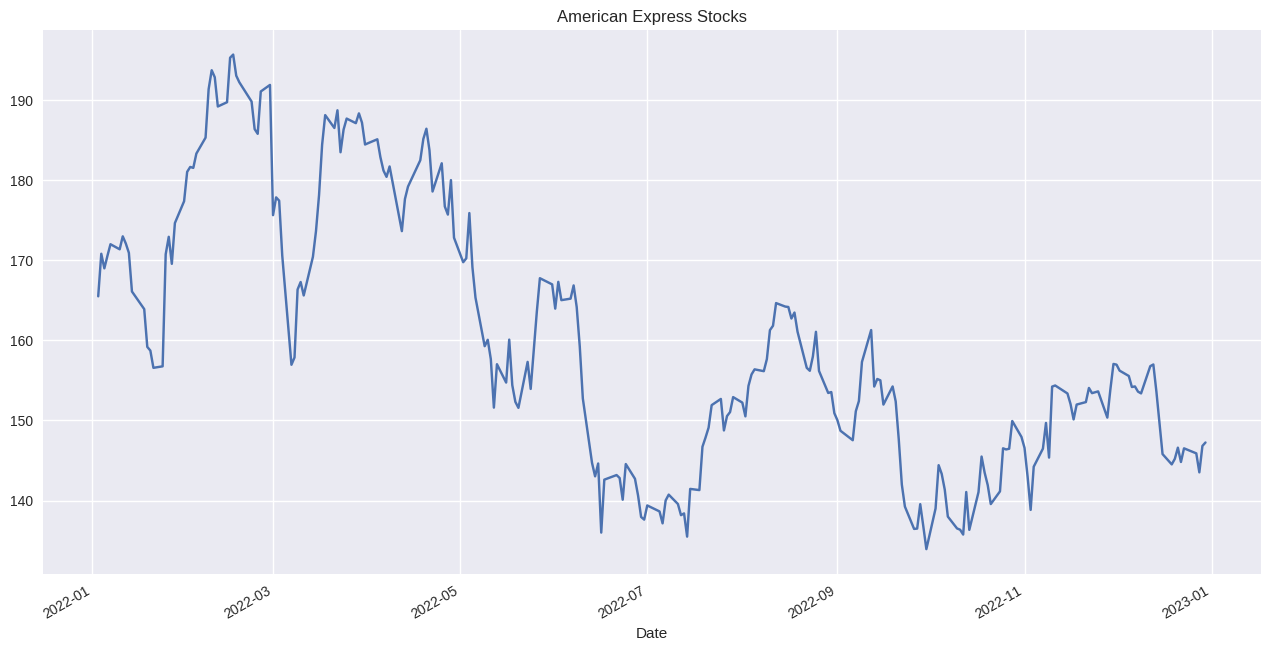

In [7]:
# Plot Adjusted Close prices
df["Close Price"].plot(title= "American Express Stocks")

In [8]:
# Calculate Bollinger Bands using ta.volatility.BollingerBands()
# with a window size of 20 and 2 standard deviations
ta_bbands = ta.volatility.BollingerBands(close=df["Close Price"], window=20, window_dev=2)

In [9]:
# Create a new dataframe with the Bollinger Bands information
ta_df = df.copy()
ta_df["bb_ma"] = ta_bbands.bollinger_mavg() 
ta_df["bb_high"] = ta_bbands.bollinger_hband() 
ta_df["bb_low"] = ta_bbands.bollinger_lband()

<Axes: title={'center': 'Bollinger Bands for American Express'}, xlabel='Date'>

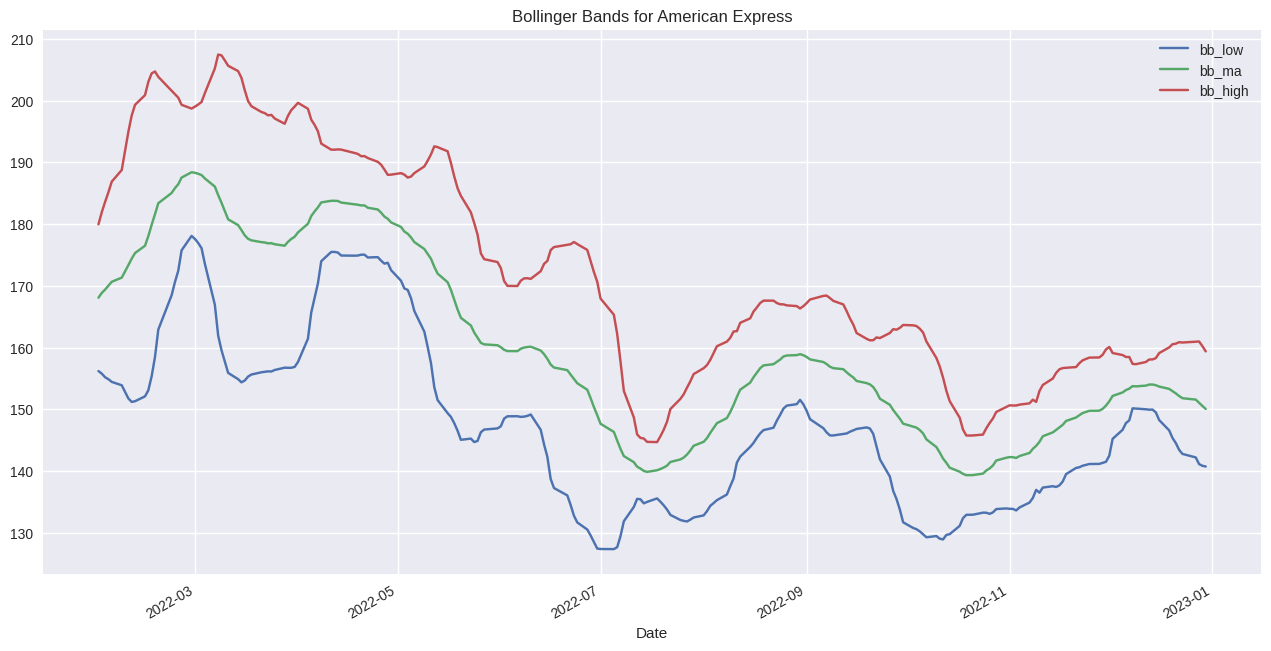

In [10]:
# Plot the Bollinger Bands
ta_df[["bb_low", "bb_ma", "bb_high"]].plot(title="Bollinger Bands for American Express")

## Stock Signals

### Using Simple Moving Average 

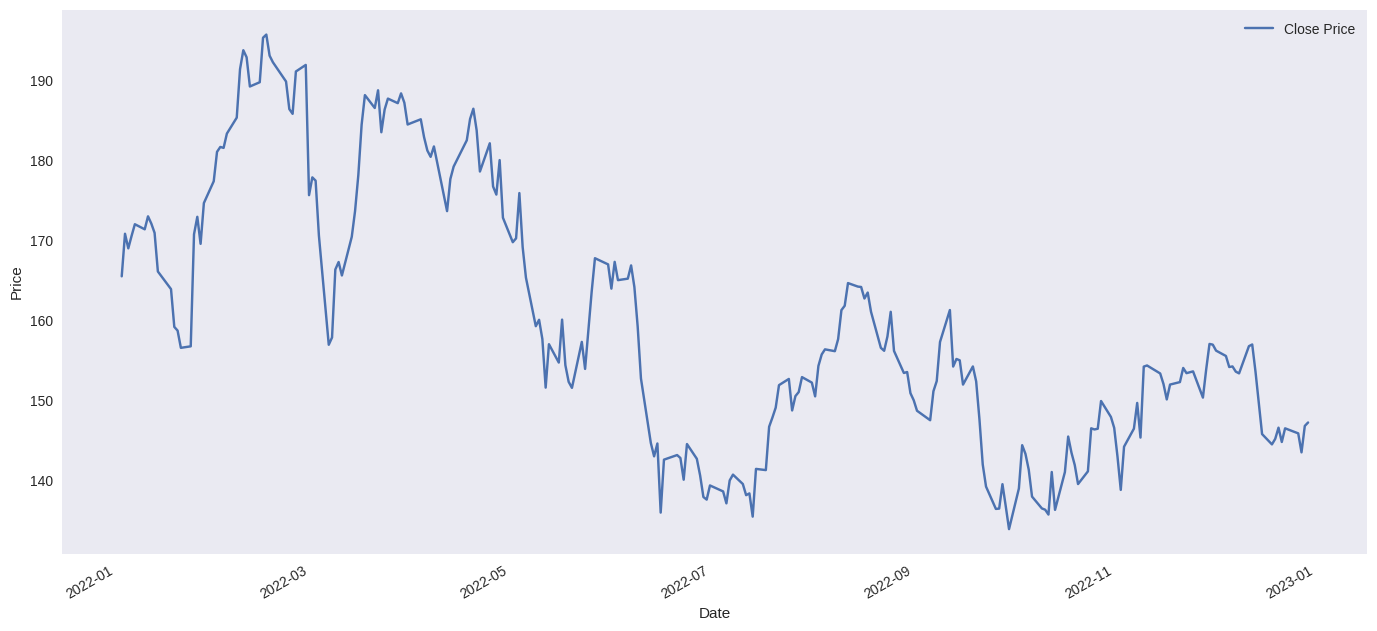

In [11]:
df.plot(figsize=(15,8))
plt.grid()
plt.ylabel("Price")
plt.show()

In [12]:
#Calculate 30-day SMA
mydata['SMA_30']=mydata['Close Price'].rolling(window=30, min_periods=1).mean()

#Calculate 90-day SMA
mydata['SMA_90']=mydata['Close Price'].rolling(window=90, min_periods=1).mean()

mydata.head(5)

,Close Price,SMA_30,SMA_90
Date,,,
2022-01-03,165.482666,165.482666,165.482666
2022-01-04,170.795090,168.138878,168.138878
2022-01-05,168.975082,168.417613,168.417613
2022-01-06,170.523499,168.944084,168.944084
2022-01-07,171.983170,169.551901,169.551901


In [13]:
mydata['Signal']=0.0
mydata['Signal']=np.where(mydata['SMA_30']> mydata['SMA_90'],1.0,0.0)

In [14]:
mydata['Position']=mydata['Signal'].diff()

mydata.head(5)

,Close Price,SMA_30,SMA_90,Signal,Position
Date,,,,,
2022-01-03,165.482666,165.482666,165.482666,0.0,NaN
2022-01-04,170.795090,168.138878,168.138878,0.0,0.0
2022-01-05,168.975082,168.417613,168.417613,0.0,0.0
2022-01-06,170.523499,168.944084,168.944084,0.0,0.0
2022-01-07,171.983170,169.551901,169.551901,0.0,0.0


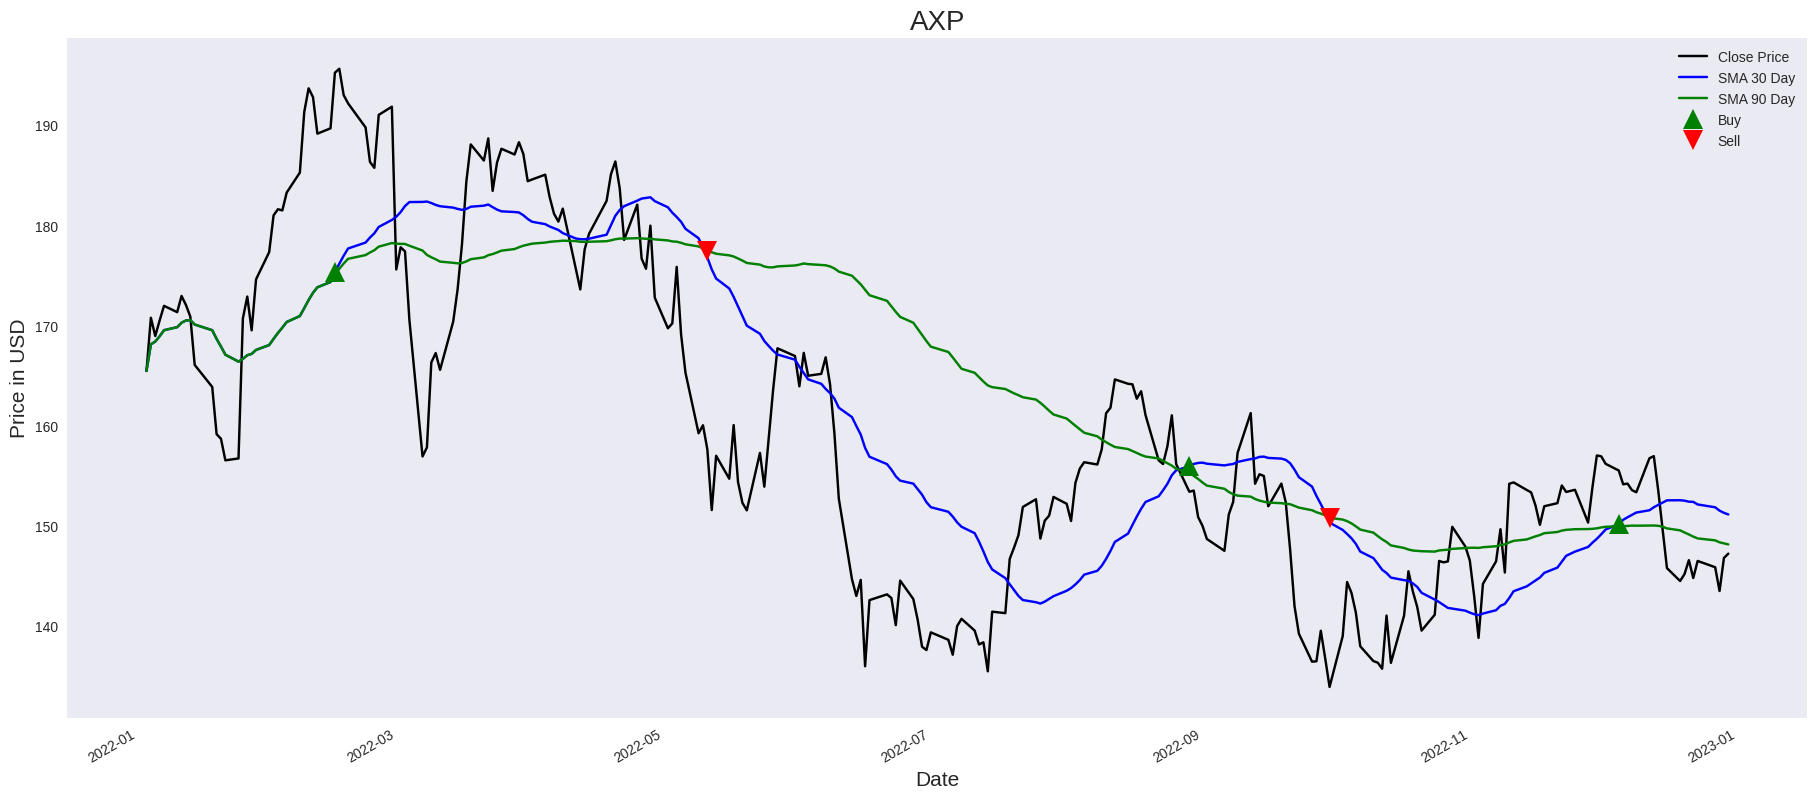

In [15]:
#Plotting SMA and Buy sell points
plt.figure(figsize=(20,10))
mydata['Close Price'].plot(color='k',label='Close Price')
mydata['SMA_30'].plot(color='b',label='SMA 30 Day')
mydata['SMA_90'].plot(color='g',label='SMA 90 Day')

#signals
plt.plot(mydata[mydata['Position']==1].index,
                mydata['SMA_30'][mydata['Position']==1],
                '^',markersize=15,color='g',label='Buy'
                )

plt.plot(mydata[mydata['Position']==-1].index,
                mydata['SMA_90'][mydata['Position']==-1],
                'v',markersize=15,color='r',label='Sell'
                )


plt.legend()
plt.title(myticker, fontsize=20)
plt.grid()
plt.ylabel("Price in USD", fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.show()

In [16]:
df_position= mydata[(mydata['Position']==1)|(mydata['Position']==-1)]
df_position['Position']=df_position['Position'].apply(lambda x: 'Buy' if x==1 else 'Sell')
print(tabulate(df_position, headers='keys', tablefmt='psql'))

+---------------------+---------------+----------+----------+----------+------------+
| Date                |   Close Price |   SMA_30 |   SMA_90 |   Signal | Position   |
|---------------------+---------------+----------+----------+----------+------------|
| 2022-02-15 00:00:00 |       195.259 |  175.354 |  175.036 |        1 | Buy        |
| 2022-05-11 00:00:00 |       157.645 |  176.806 |  177.49  |        0 | Sell       |
| 2022-08-29 00:00:00 |       153.421 |  155.968 |  155.343 |        1 | Buy        |
| 2022-09-30 00:00:00 |       133.933 |  150.343 |  150.811 |        0 | Sell       |
| 2022-12-05 00:00:00 |       155.541 |  150.182 |  149.971 |        1 | Buy        |
+---------------------+---------------+----------+----------+----------+------------+


In [17]:
mydata.drop(['SMA_30','SMA_90','Signal','Position'], axis=1, inplace=True)
mydata.head()

,Close Price
Date,
2022-01-03,165.482666
2022-01-04,170.795090
2022-01-05,168.975082
2022-01-06,170.523499
2022-01-07,171.983170


### Using Exponential Moving Average 

In [19]:
# Calculate 30-day EMA
mydata['EMA_30'] = mydata['Close Price'].ewm(span=30, adjust=False).mean()

# Calculate 90-day EMA
mydata['EMA_90'] = mydata['Close Price'].ewm(span=90, adjust=False).mean()

mydata.head(5)

,Close Price,EMA_30,EMA_90
Date,,,
2022-01-03,165.482666,165.482666,165.482666
2022-01-04,170.795090,165.825403,165.599423
2022-01-05,168.975082,166.028608,165.673613
2022-01-06,170.523499,166.318601,165.780204
2022-01-07,171.983170,166.684057,165.916533


In [20]:
mydata['Signal']=0.0
mydata['Signal']=np.where(mydata['EMA_30']> mydata['EMA_90'],1.0,0.0)
mydata['Position']=mydata['Signal'].diff()

mydata.head(5)


,Close Price,EMA_30,EMA_90,Signal,Position
Date,,,,,
2022-01-03,165.482666,165.482666,165.482666,0.0,NaN
2022-01-04,170.795090,165.825403,165.599423,1.0,1.0
2022-01-05,168.975082,166.028608,165.673613,1.0,0.0
2022-01-06,170.523499,166.318601,165.780204,1.0,0.0
2022-01-07,171.983170,166.684057,165.916533,1.0,0.0


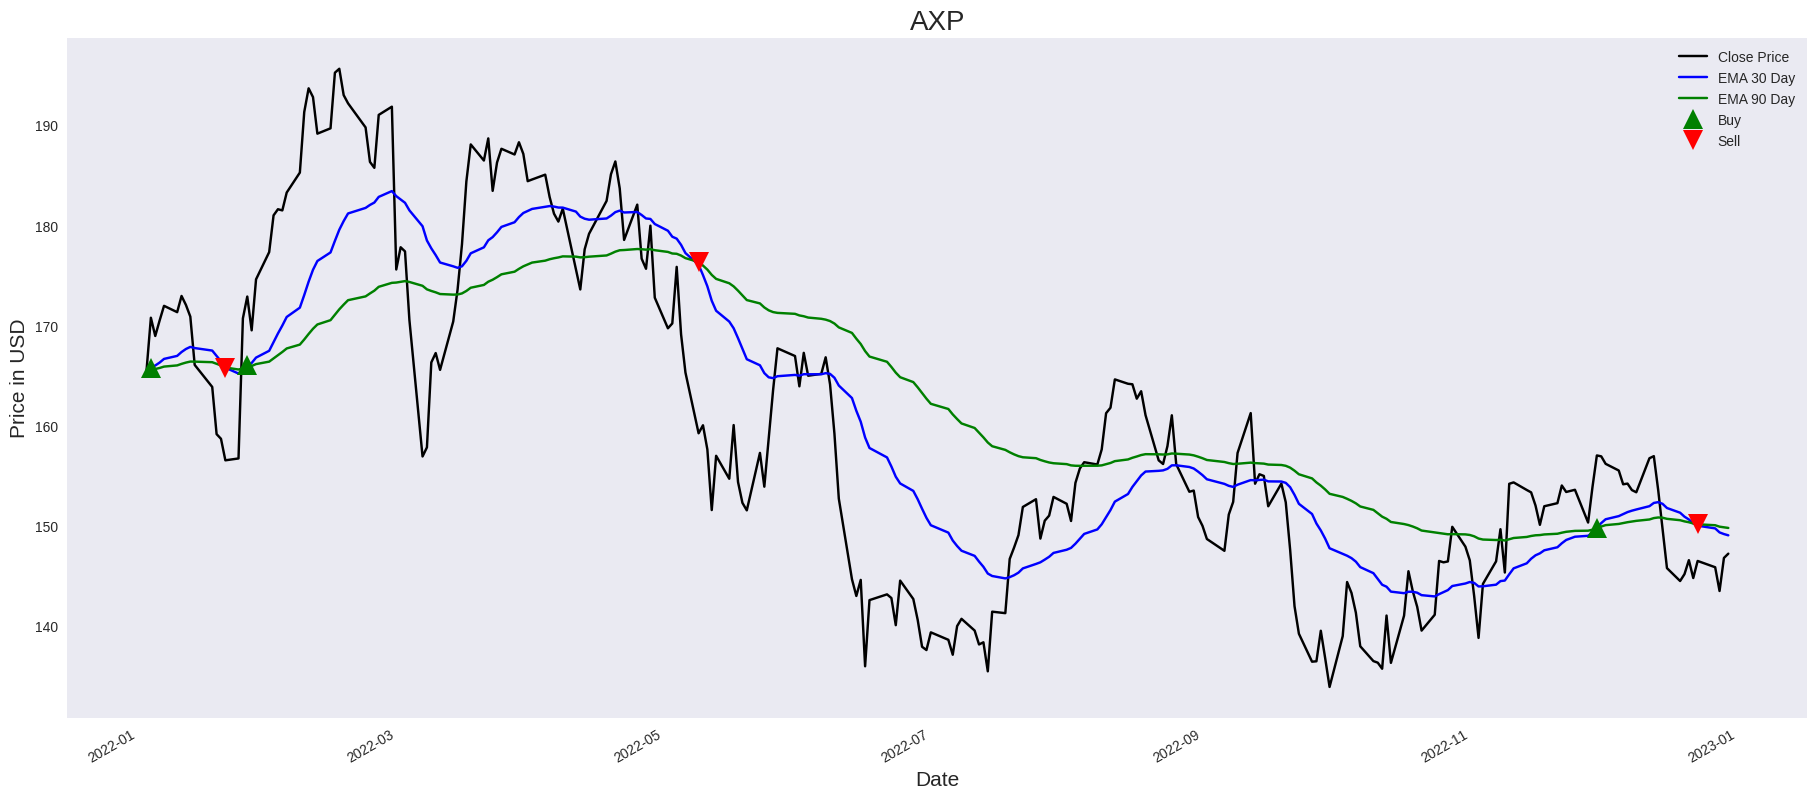

In [21]:
#Plotting EMA and Buy sell points
plt.figure(figsize=(20,10))
mydata['Close Price'].plot(color='k',label='Close Price')
mydata['EMA_30'].plot(color='b',label='EMA 30 Day')
mydata['EMA_90'].plot(color='g',label='EMA 90 Day')

#signals
plt.plot(mydata[mydata['Position']==1].index,
         mydata['EMA_30'][mydata['Position']==1],
         '^', markersize=15, color='g', label='Buy'
)

plt.plot(mydata[mydata['Position']==-1].index,
         mydata['EMA_90'][mydata['Position']==-1],
         'v', markersize=15, color='r', label='Sell'
                )


plt.legend()
plt.title(myticker, fontsize=20)
plt.grid()
plt.ylabel("Price in USD", fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.show()


In [22]:
df_position= mydata[(mydata['Position']==1)|(mydata['Position']==-1)]
df_position['Position']=df_position['Position'].apply(lambda x: 'Buy' if x==1 else 'Sell')
print(tabulate(df_position, headers='keys', tablefmt='psql'))

+---------------------+---------------+----------+----------+----------+------------+
| Date                |   Close Price |   EMA_30 |   EMA_90 |   Signal | Position   |
|---------------------+---------------+----------+----------+----------+------------|
| 2022-01-04 00:00:00 |       170.795 |  165.825 |  165.599 |        1 | Buy        |
| 2022-01-21 00:00:00 |       156.558 |  165.807 |  165.825 |        0 | Sell       |
| 2022-01-26 00:00:00 |       172.91  |  166.051 |  165.895 |        1 | Buy        |
| 2022-05-09 00:00:00 |       159.258 |  176.09  |  176.361 |        0 | Sell       |
| 2022-11-30 00:00:00 |       157.046 |  149.833 |  149.792 |        1 | Buy        |
| 2022-12-23 00:00:00 |       146.512 |  150.032 |  150.172 |        0 | Sell       |
+---------------------+---------------+----------+----------+----------+------------+


## Forecasting

### Using Facebook Prophet

Here we are using data from January 1, 2022to  December 31, 2022 to create the model, and we are creating projection for January 1, 2023
to December 31, 2023.

In [23]:
df = df.reset_index()
df[['ds', 'y']]= df[['Date','Close Price']] 

In [24]:
df

,Date,Close Price,ds,y
0,2022-01-03,165.482666,2022-01-03,165.482666
1,2022-01-04,170.795090,2022-01-04,170.795090
2,2022-01-05,168.975082,2022-01-05,168.975082
3,2022-01-06,170.523499,2022-01-06,170.523499
4,2022-01-07,171.983170,2022-01-07,171.983170
...,...,...,...,...
246,2022-12-23,146.512161,2022-12-23,146.512161
247,2022-12-27,145.884338,2022-12-27,145.884338
248,2022-12-28,143.512558,2022-12-28,143.512558
249,2022-12-29,146.811127,2022-12-29,146.811127


In [25]:
model=Prophet()

In [26]:
prophet_df = df.drop(['Date', 'Close Price'], axis = 1)

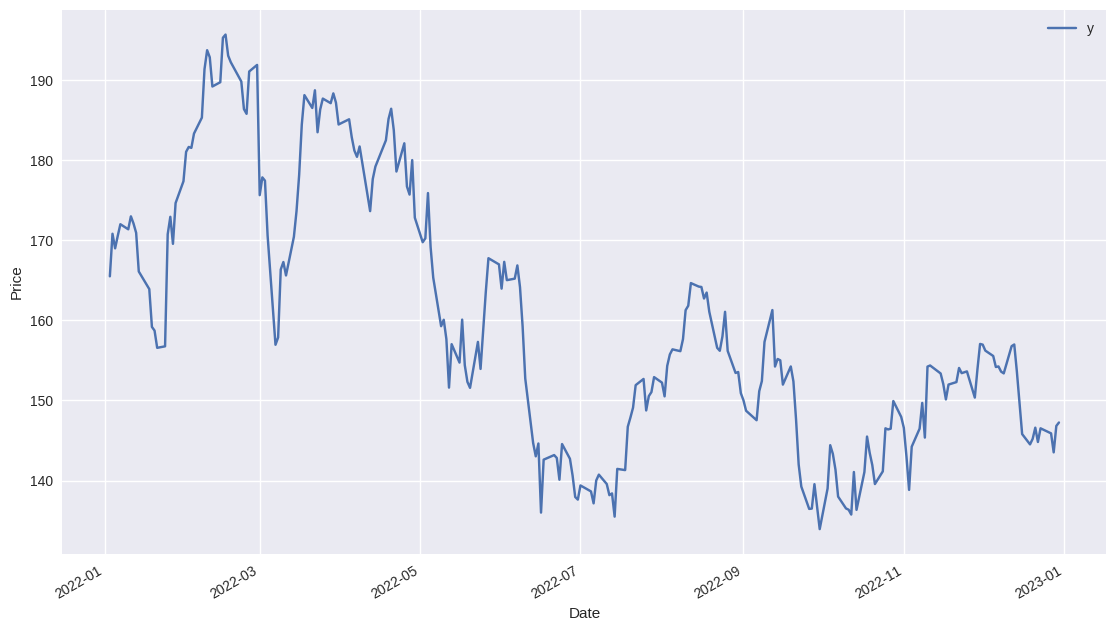

In [27]:
ax=prophet_df.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel("Price")
ax.set_xlabel('Date')
plt.show()

In [28]:
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp28n81h4u/92r482bw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp28n81h4u/nhonf9nl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41367', 'data', 'file=/tmp/tmp28n81h4u/92r482bw.json', 'init=/tmp/tmp28n81h4u/nhonf9nl.json', 'output', 'file=/tmp/tmp28n81h4u/prophet_modelr5a5yx34/prophet_model-20230405210723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:07:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:07:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
future=model.make_future_dataframe(periods=252)

In [31]:
predictions=model.predict(future)

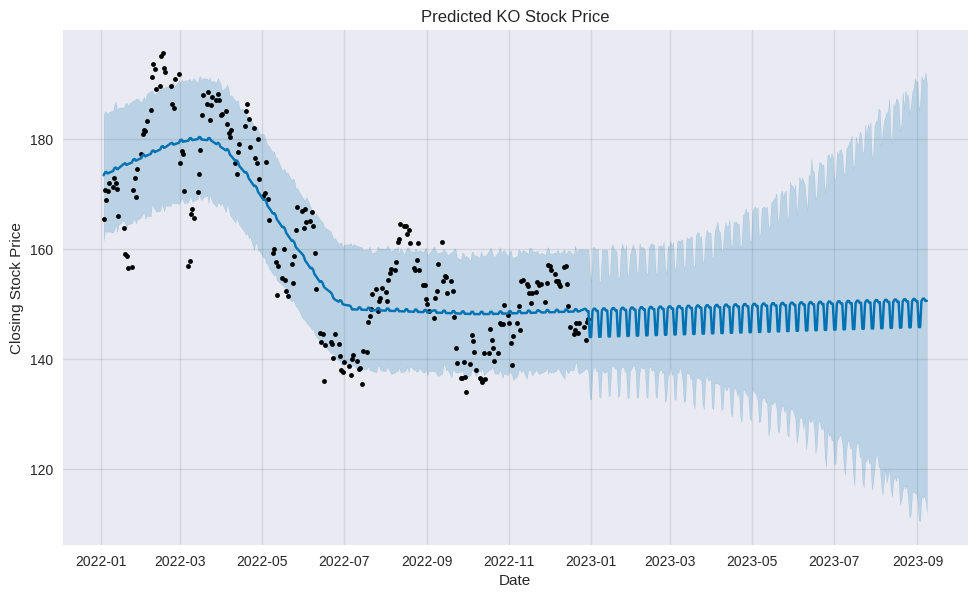

In [33]:
model.plot(predictions)
plt.title("Predicted KO Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel('Date')
plt.show()

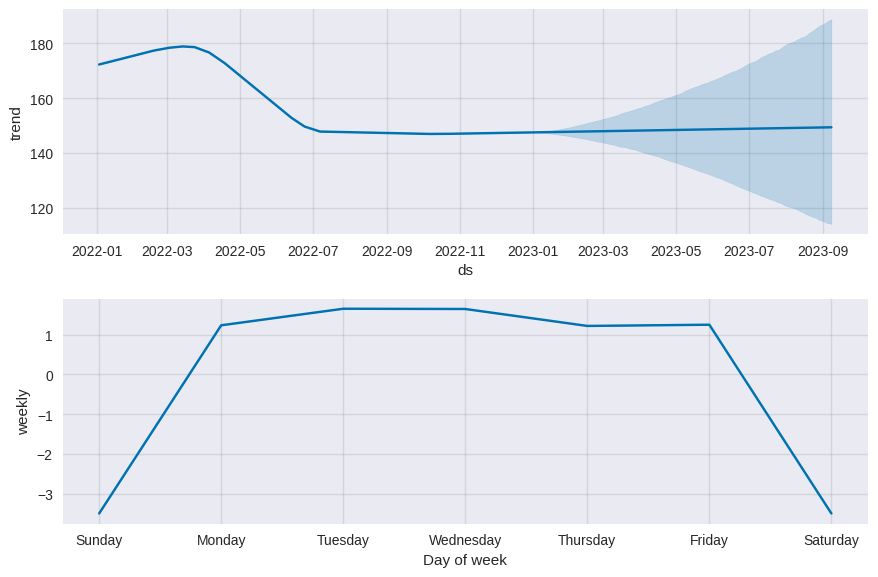

In [34]:
model.plot_components(predictions)
plt.show()